# Predicting Probability of Developing Congenital Heart Defects (CHDs)

Author: Haniya Ali

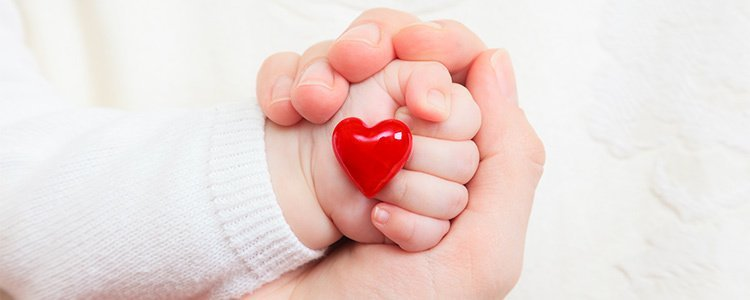

Image credit: https://mendedhearts.org/story/chd-facts-and-statistics/

### Intoduction

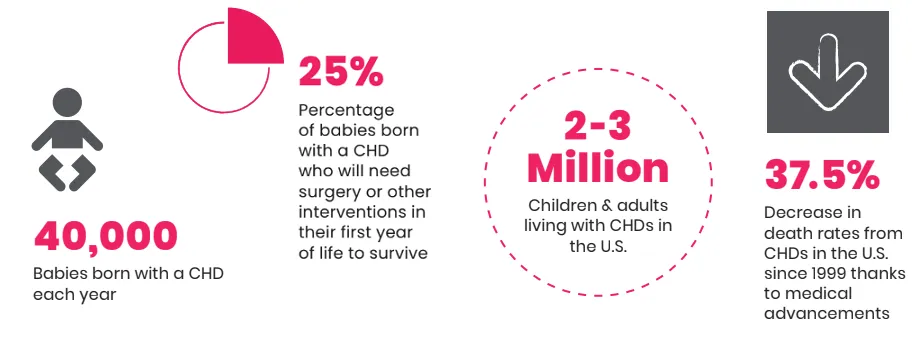

Image credit: https://www.childrensheartfoundation.org/about-chds/chd-facts-information.html

**Congenital heart defects (CHDs)**, also known as congenital heart abnormalities, are medical conditions that can impact the structure and function of an individual's heart. These defects occur when a baby's heart does not develop normally during pregnancy. They are considered the most common type of birth defect, as stated by the National Library of Medicine.

According to estimates from the Centers for Disease Control and Prevention (CDC), CHDs affect nearly 1% of births in the United States, which accounts for approximately **40,000 births per year**. It's important to note that the prevalence of CHDs can vary depending on the specific type of defect.

Over time, there has been an observed increase in the number of babies born with certain types of heart defects, particularly milder forms, when compared to the overall number of births. On the other hand, the prevalence of other types of congenital heart defects has remained stable.

It is crucial to raise awareness about CHDs and ensure early detection, accurate diagnosis, and appropriate treatment options to improve the outcomes for individuals with congenital heart defects.

### Abstract

During the late 1940s, the United States government initiated a significant endeavor to explore cardiovascular disease. To ensure the generation of high-quality data, they made the strategic decision to monitor a large group of initially healthy individuals over an extended period. The chosen location for this study was Framingham, Massachusetts, a suburb of Boston, where the project commenced in 1948. A total of **5,209 participants**, aged between 30 and 62, were enrolled in the study.

At regular intervals of two years, participants underwent both a medical examination and responded to a questionnaire. In addition to gathering medical test data, the study also captured information related to the participants' physical and behavioral characteristics. As time progressed, the study expanded its scope, encompassing multiple generations and incorporating numerous additional factors, including genetic information. This extensive dataset is now widely recognized as the Framingham Heart Study, an illustrious and influential resource within cardiovascular research.

In this project, we will utilize the data from the **Framingham Heart Study** to predict coronary heart disease (CHD) and offer recommendations to enhance heart disease prevention. The dataset consists of 3,658 observations, each representing data from a specific study participant. It comprises 16 variables, and the target variable we aim to predict is **TenYearCHD**, which indicates whether a patient will experience coronary heart disease within ten years of their initial examination. Through our modeling endeavors, we anticipate identifying risk factors, which are the variables that heighten the risk of developing CHD.

The primary model that will be employed for this project will be a **logistic regression model** because it is well-suited for predicting binary outcomes like the occurrence of coronary heart disease within ten years.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

?smf.logit

In [2]:
# Only required for the first iteration 
# pip install statsmodel

### Dataset

Dataset provided by IEOR 142 at UC Berkeley, Fall 2022 iteration. 

In [3]:
fra_train = pd.read_csv('/Users/haniyaali/Downloads/framingham_train_fall22.csv')
fra_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,38,High school/GED,1,20,0,0,0,0,195,116.0,72.0,24.45,75,90,0
1,1,46,Some high school,1,43,0,0,0,0,237,105.0,72.5,33.49,67,79,0
2,0,62,Some college/vocational school,0,0,0,0,1,0,312,204.0,118.0,24.83,67,86,1
3,1,43,Some college/vocational school,1,15,0,0,0,0,224,97.0,64.0,23.05,75,68,0
4,1,50,College,0,0,0,0,0,0,259,132.5,92.0,30.41,68,75,0


In [4]:
fra_train = pd.read_csv('/Users/haniyaali/Downloads/framingham_train_fall22.csv')
fra_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,38,High school/GED,1,20,0,0,0,0,195,116.0,72.0,24.45,75,90,0
1,1,46,Some high school,1,43,0,0,0,0,237,105.0,72.5,33.49,67,79,0
2,0,62,Some college/vocational school,0,0,0,0,1,0,312,204.0,118.0,24.83,67,86,1
3,1,43,Some college/vocational school,1,15,0,0,0,0,224,97.0,64.0,23.05,75,68,0
4,1,50,College,0,0,0,0,0,0,259,132.5,92.0,30.41,68,75,0


In [5]:
fra_test = pd.read_csv('/Users/haniyaali/Downloads/framingham_test_fall22.csv')
fra_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,Some high school,1,5,0,0,1,0,240,150.0,84.0,26.85,75,94,1
1,0,49,High school/GED,1,1,0,0,0,0,240,110.0,71.0,22.02,73,84,0
2,1,63,Some high school,0,0,0,0,1,0,235,199.0,114.0,29.76,95,84,0
3,0,41,High school/GED,0,0,0,0,0,0,213,112.0,73.0,24.81,62,74,0
4,1,52,Some high school,0,0,0,0,0,0,285,135.0,86.0,27.78,88,93,0


### EDA and Data Cleaning 

Note: The training set has 2560 data points, which
are randomly selected from the original framingham.csv dataset (around 70%).

#### Features of the dataset

In [6]:
# List of all independent variables present in the dataset
fra_train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Handling missing values 

In [7]:
# Counting NaN values in training data
nan_count_train = fra_train.isna().sum().sum()
print(nan_count_train)

0


In [8]:
# Counting NaN values in test data
nan_count_test = fra_test.isna().sum().sum()
print(nan_count_test)

0


#### One-Hot encoding data

In [9]:
fra_train_cat = pd.get_dummies(fra_train) 
fra_train_cat.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High school/GED,education_Some college/vocational school,education_Some high school
0,0,38,1,20,0,0,0,0,195,116.0,72.0,24.45,75,90,0,0,1,0,0
1,1,46,1,43,0,0,0,0,237,105.0,72.5,33.49,67,79,0,0,0,0,1
2,0,62,0,0,0,0,1,0,312,204.0,118.0,24.83,67,86,1,0,0,1,0
3,1,43,1,15,0,0,0,0,224,97.0,64.0,23.05,75,68,0,0,0,1,0
4,1,50,0,0,0,0,0,0,259,132.5,92.0,30.41,68,75,0,1,0,0,0


In [10]:
fra_test_cat = pd.get_dummies(fra_test)
fra_test_cat.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High school/GED,education_Some college/vocational school,education_Some high school
0,0,58,1,5,0,0,1,0,240,150.0,84.0,26.85,75,94,1,0,0,0,1
1,0,49,1,1,0,0,0,0,240,110.0,71.0,22.02,73,84,0,0,1,0,0
2,1,63,0,0,0,0,1,0,235,199.0,114.0,29.76,95,84,0,0,0,0,1
3,0,41,0,0,0,0,0,0,213,112.0,73.0,24.81,62,74,0,0,1,0,0
4,1,52,0,0,0,0,0,0,285,135.0,86.0,27.78,88,93,0,0,0,0,1


#### Fixing column names

In [11]:
fra_train_cat= fra_train_cat.rename(columns = {"education_High school/GED": "education_High_school_GED", "education_Some college/vocational school": "education_Some_college_vocational_school", "education_Some high school": "education_Some_high_school"})
fra_train_cat.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High_school_GED,education_Some_college_vocational_school,education_Some_high_school
0,0,38,1,20,0,0,0,0,195,116.0,72.0,24.45,75,90,0,0,1,0,0
1,1,46,1,43,0,0,0,0,237,105.0,72.5,33.49,67,79,0,0,0,0,1
2,0,62,0,0,0,0,1,0,312,204.0,118.0,24.83,67,86,1,0,0,1,0
3,1,43,1,15,0,0,0,0,224,97.0,64.0,23.05,75,68,0,0,0,1,0
4,1,50,0,0,0,0,0,0,259,132.5,92.0,30.41,68,75,0,1,0,0,0


In [12]:
fra_test_cat= fra_test_cat.rename(columns = {"education_High school/GED": "education_High_school_GED", "education_Some college/vocational school": "education_Some_college_vocational_school", "education_Some high school": "education_Some_high_school"})
fra_test_cat.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High_school_GED,education_Some_college_vocational_school,education_Some_high_school
0,0,58,1,5,0,0,1,0,240,150.0,84.0,26.85,75,94,1,0,0,0,1
1,0,49,1,1,0,0,0,0,240,110.0,71.0,22.02,73,84,0,0,1,0,0
2,1,63,0,0,0,0,1,0,235,199.0,114.0,29.76,95,84,0,0,0,0,1
3,0,41,0,0,0,0,0,0,213,112.0,73.0,24.81,62,74,0,0,1,0,0
4,1,52,0,0,0,0,0,0,285,135.0,86.0,27.78,88,93,0,0,0,0,1


In [13]:
fra_train_cat.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD',
       'education_College', 'education_High_school_GED',
       'education_Some_college_vocational_school',
       'education_Some_high_school'],
      dtype='object')

### Model 

Building a logistic regression model to predict the probability that a patient will experience CHD within the next 10 years.


#### Model Fitting

In [14]:
# Fitting the logistic regression model
logreg = smf.logit(formula = 'TenYearCHD ~ age + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose + male + education_College + education_High_school_GED + education_Some_college_vocational_school + education_Some_high_school',
                   data = fra_train_cat).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.371714
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1206
Time:                        23:36:50   Log-Likelihood:                -951.59
converged:                       True   LL-Null:                       -1082.1
Covariance Type:            nonrobust   LLR p-value:                 1.123e-45
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -6.4

#### Regression Equation

The **equation** used by the model to make the predictions is as follows:

y = 0.0555 * age + 0.1897 * currentSmoker + 0.0077 * cigsPerDay + 0.0489 * BPMeds + 0.5195 * prevalentStroke +   

0.3617 * prevalentHyp + 0.0953 * diabetes + 0.0036 * totChol + 0.0158 * sysBP -0.0071 * diaBP + 

0.0153 * BMI -0.0094 * heartRate + 0.0085 * glucose + 

0.5634 * male -1.4816 * education_College - 1.6837 * education_High_school_GED  

-1.8105 * education_Some_college_vocational_school -1.4703* education_Some_high_school

Since this is a logistic regression model, we interpret the coefficients as the follows:

**given an independent variable x, increasing x by 1 unit changes the log odds by the coefficient correponding to x**.

#### Making Predictions

In [15]:
# Using fitted model to make predictions on the test set
y_test = fra_test_cat['TenYearCHD']
y_prob = logreg.predict(fra_test_cat) 

# creating a predicted binary output based on the predicted probabilities obtained from the model
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index) 
y_pred

0       0
1       0
2       0
3       0
4       0
       ..
1093    0
1094    0
1095    0
1096    0
1097    0
Length: 1098, dtype: int64

Further Explanantion: For each x value, it checks if the probability is greater than 0.5. If it is, it assigns a value of 1 to that observation in y_pred; otherwise, it assigns a value of 0. This threshold of 0.5 is commonly used to classify observations into two categories based on probabilities.

### Model Evaluation

We are using a confusion matrix to evaluate the performance and accuracy of the binary classification model. It will provide us with a tabular representation of the predicted and actual classifications made by the model.

In [16]:
from sklearn.metrics import confusion_matrix

?confusion_matrix

The cm.ravel() is a method used to flatten the confusion matrix into a 1-dimensional array.

We are applying cm.ravel() to the confusion matrix to rearrange it into a 1D array by concatenating its rows, effectively transforming it into a linear sequence or a 1D array.

In [17]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[919   6]
 [163  10]]


In [18]:
print(cm.ravel())

[919   6 163  10]


#### Accuracy

To calculate accuracy, we sum the counts of true negatives and true positives, which are the correct predictions, and divide it by the total number of observations. More specifically, we access the first element of the flattened matrix (cm.ravel()[0]) which represents the count of true negatives (TN) and the fourth element (cm.ravel()[3]) which represents the count of true positives (TP). We divide the sum of these values by the sum of all elements in the flattened matrix (sum(cm.ravel())). The result is the accuracy of the classification model.

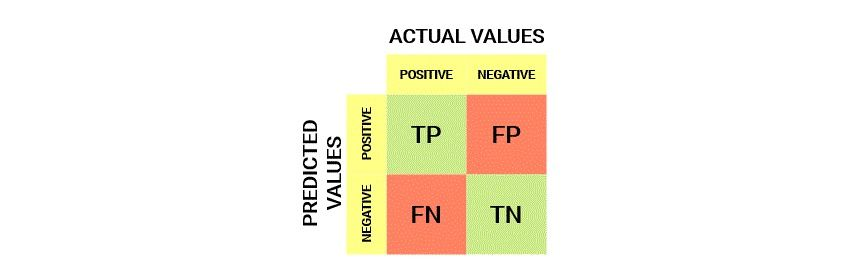

In [19]:
# Accuracy
(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

0.8460837887067395

#### Performance

We will be using the Receiver Operating Characteristic (ROC) curve for our logistic regression model on the test set to describe how this curve may be helpful to decision-makers looking to prevent CHD. 

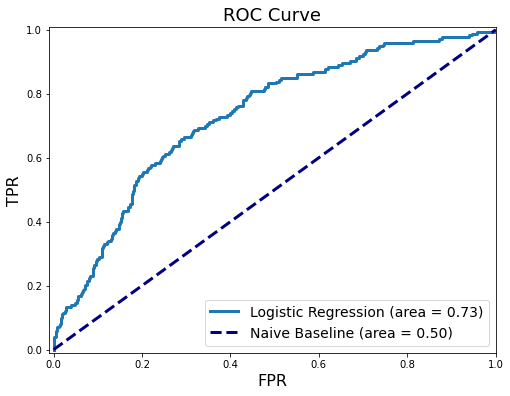

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = fra_test_cat['TenYearCHD']
y_prob_new = logreg.predict(fra_test_cat)

fpr, tpr, _ = roc_curve(y_test, y_prob_new)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The ROC curve illustrates all different thresholds to classify a patient at risk of developing CHD. This ROC curve can be used for further research by determining the most optimal threshold; one that is farther away from the Naive Baseline. This can allow researchers to collect different information on a patient and if the model's probability is > that that optimal threshold, then doctors can prescribe medications to a patient. 

AUC: 0.73

### Insights

#### The most important risk factors for 10-year CHD risk identified by the model

In order to determine which factors most accurately predict CHD, I will be using the p-value. If a variable has a p-value <0.05, it means that it is strongly related to the dependent variable. 

Based on this metric, the most important risk factors for predicting CHD are as follows:

i. age

ii. sysBP

iii. heartRate

iv. glucose

v. male

One of the most important risk factors is age. The coefficient associated with this variable is 0.0555. 

Since this is a logistic regression model, we can say that e^beta = e^0.0555 =~ 1.06.

So the odds ratio that associates age to risk of developing CHD in the next 10 years is 1.06.



### Example of model application 

In order to understand the applications of this model, we will consider a hypothetical scenario where the patient with the following characteristics visits a doctor:

**Male, age 48, college education, currently a smoker with an average of 18
cigarettes per day. Currently on blood pressure medication, has not had
stroke but is hypertensive. Currently diagnosed with diabetes; total Choles-
terol at 240. Systolic/diastolic blood pressure at 140/90, BMI at 36, heart
rate at 72, glucose level at 105.**

In [21]:
my_patient = {'male': 0, 'age':48, 'currentSmoker':1, 'cigsPerDay':18, 'BPMeds':1,
       'prevalentStroke':0, 'prevalentHyp':1, 'diabetes':1, 'totChol':240, 'sysBP':140,
       'diaBP':90, 'BMI':36, 'heartRate':72, 'glucose':105, 
       'education_College':1, 'education_High_school_GED':0,
       'education_Some_college_vocational_school':0,
       'education_Some_high_school':0}

In [22]:
my_patient_data = pd.DataFrame.from_dict(my_patient, orient = 'index').T
my_patient_data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_College,education_High_school_GED,education_Some_college_vocational_school,education_Some_high_school
0,0,48,1,18,1,0,1,1,240,140,90,36,72,105,1,0,0,0


The predicted probability that this patient will experience CHD in the next ten years:

In [23]:
prob_my_patient_chd = logreg.predict(my_patient_data)[0]
prob_my_patient_chd

0.2259496384436209

Since the probability that this patient will experience CHD is around 0.23 which is greater than the threshold of 0.11, the physician should prescribe the preventive medication for this patient.

### Conclusion 

In order to offer recommendations to enhance heart disease prevention, this project used the Framingham Heart Study data to develop a logistic regression model that can predict how likeley someone is to develop coronary heart disease within ten years. The model accuracy was ~85% on the test set. 

Our analysis also revealed that the most important risk factors for predicting CHD are:

i. age

ii. sysBP

iii. heartRate

iv. glucose

v. gender (male)

### Further Considerations

Despite the dataset containing 16 independent variable, the dataset does not contain any information on the racial distribution of the sample of indivdiuals that it was collected from. Some medical conditions like blood pressure, diabetes, etc are more prevalent in certain populations. As such it is essential for a predictive model that uses independent variables to predict the risk of developing CHD to include some metric of determining the racial, ethnic, or geographic identity. The consequence of not having this information is that we may have trained the model on indivdiuals in the US where serving sizes are larger. If we use this model to predict CHD on indivduals in another country, we may not get a correct representation of the underlying trends.

The analysis could be imporved by identifying the exact population from which the samples were derived. This consistency would allow us to ensure that we are training and testing the model on the appropriate individuals.